<a href="https://www.kaggle.com/code/rishabhbhartiya/20-years-of-google-stock-insights-visualisation?scriptVersionId=242598316" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: center;">
  <img src="https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExaXVtaXBteWw1emNvdzZ5eTEzMTdlOWh3bzFzaHluZzN5c3Jrd3I5NSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3oKGzFba1fQEuthrkQ/giphy.gif" alt="Centered GIF">
</div>

In [1]:
import os
import imageio
import warnings
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from IPython.display import IFrame
import matplotlib.patches as patches
from plotly.subplots import make_subplots

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/google-daily-stock-prices-2004-today/googl_daily_prices.csv")

In [3]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.day_name()

In [4]:
df = df.rename(columns={
    '1. open': 'open',
    '2. high': 'high',
    '3. low': 'low',
    '4. close': 'close',
    '5. volume': 'volume'
})

<div style="
    width: 100%;
    max-width: 900px;
    margin: 20px auto;
    padding: 20px;
    border-radius: 10px;
    background: #ffffff;
    color: #111;
    font-family: 'Courier New', monospace;
    font-size: 18px;
    font-weight: bold;
    text-align: center;
    text-transform: uppercase;
    letter-spacing: 2px;
    box-shadow: 4px 4px 10px rgba(0, 0, 0, 0.2);
">
    VISUALIZATION OF GOOGLE STOCK PRICE 2020 
</div>

<div style="
    background-color: #f5f5f5;
    border: 2px solid #555;
    padding: 20px;
    border-radius: 8px;
    font-family: 'Georgia', serif;
    line-height: 1.8;
    max-width: 700px;
    margin: auto;
    box-shadow: 5px 5px 10px rgba(0,0,0,0.1);">
    <h2 style="color: #333; text-align: center;">CANDLE STICK GRAPH</h2>
    <blockquote style="border-left: 4px solid #555; padding-left: 10px;">
        Candle
    </blockquote>
    <blockquote style="border-left: 4px solid #555; padding-left: 10px;">
        SMA and Bollinger Bands
    </blockquote>
    <blockquote style="border-left: 4px solid #555; padding-left: 10px;">
        Volume
    </blockquote><blockquote style="border-left: 4px solid #555; padding-left: 10px;">
        RSI plot
    </blockquote>
</div>

In [5]:
df_2020 = df[df['year'] == 2020].sort_values('date').reset_index(drop=True) #this is a input to a function

os.makedirs('frames', exist_ok=True)
filenames = []

x_step = list(range(4))
STEP_PER_DAY = 4
LABEL_INTERVAL_DAYS = 10
TICK_SPACING = STEP_PER_DAY * LABEL_INTERVAL_DAYS
TOTAL_DAYS = len(df_2020)
X_MAX = TOTAL_DAYS * STEP_PER_DAY

df_2020['SMA'] = df_2020['close'].rolling(window=10, min_periods=1).mean()

df_2020['BB_MID'] = df_2020['close'].rolling(window=20, min_periods=1).mean()
df_2020['BB_STD'] = df_2020['close'].rolling(window=20, min_periods=1).std()
df_2020['BB_UPPER'] = df_2020['BB_MID'] + (2 * df_2020['BB_STD'])
df_2020['BB_LOWER'] = df_2020['BB_MID'] - (2 * df_2020['BB_STD'])

delta = df_2020['close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(window=14, min_periods=1).mean()
avg_loss = loss.rolling(window=14, min_periods=1).mean()
rs = avg_gain / avg_loss
df_2020['RSI'] = 100 - (100 / (1 + rs))

tick_positions = list(range(0, X_MAX, TICK_SPACING))

for i in range(TOTAL_DAYS):
    fig, (ax, ax_rsi) = plt.subplots(nrows=2, figsize=(14, 7), gridspec_kw={'height_ratios': [4, 1]})
    for j in range(i):
        row = df_2020.loc[j]
        color = 'green' if row['close'] >= row['open'] else 'red'
        ax.plot([j * STEP_PER_DAY]*2, [row['low'], row['high']], color=color, alpha=0.4)
        ax.add_patch(patches.Rectangle((j * STEP_PER_DAY - 0.5, min(row['open'], row['close'])),
                                       1, abs(row['close'] - row['open']),
                                       color=color, alpha=0.4))
    row = df_2020.loc[i]
    color = 'green' if row['close'] >= row['open'] else 'red'
    ax.plot([i * STEP_PER_DAY]*2, [row['low'], row['high']], color=color)
    ax.add_patch(patches.Rectangle((i * STEP_PER_DAY - 0.5, min(row['open'], row['close'])),
                                   1, abs(row['close'] - row['open']),
                                   color=color))

    if i >= 1:
        ax.plot([j * STEP_PER_DAY + 1.5 for j in range(i + 1)], df_2020.loc[:i, 'SMA'], linestyle='--', color='blue', label='SMA')
        ax.plot([j * STEP_PER_DAY + 1.5 for j in range(i + 1)], df_2020.loc[:i, 'BB_UPPER'], color='purple', linestyle='--', linewidth=0.8)
        ax.plot([j * STEP_PER_DAY + 1.5 for j in range(i + 1)], df_2020.loc[:i, 'BB_LOWER'], color='purple', linestyle='--', linewidth=0.8)

    if 'volume' in df_2020.columns:
        ax2 = ax.twinx()
        ax2.bar([j * STEP_PER_DAY for j in range(i + 1)], df_2020.loc[:i, 'volume'], width=1.0,
                color='grey', alpha=0.2)
        ax2.set_ylim(0, df_2020['volume'].max() * 3)
        ax2.set_ylabel("Volume")

    tick_labels = []
    for pos in tick_positions:
        day_index = pos // STEP_PER_DAY
        if day_index <= i:
            tick_labels.append(str(df_2020.loc[day_index]['date'].date()))
        else:
            tick_labels.append("")

    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=45)
    ax.set_xlim(0, X_MAX + 20)
    ax.set_ylim(df_2020[['low', 'high']].min().min(), df_2020[['high']].max().max())
    ax.set_title(f"Daily Candle Chart up to {row['date'].date()}")
    ax.set_ylabel("Price")
    ax.grid(True, linestyle='--', alpha=0.3)
    ax_rsi.plot([j * STEP_PER_DAY + 1.5 for j in range(i + 1)], df_2020.loc[:i, 'RSI'], color='orange')
    ax_rsi.axhline(70, linestyle='--', color='red', alpha=0.3)
    ax_rsi.axhline(30, linestyle='--', color='green', alpha=0.3)
    ax_rsi.set_ylim(0, 100)
    ax_rsi.set_ylabel("RSI")
    ax_rsi.set_xticks(tick_positions)
    ax_rsi.set_xticklabels(tick_labels, rotation=45)
    ax_rsi.grid(True, linestyle='--', alpha=0.2)

    filename = f"frames/frame_{i}.png"
    plt.tight_layout()
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

with imageio.get_writer('final_lab.gif', mode='I', duration=0.2, loop=0) as writer:
    for filename in filenames:
        writer.append_data(imageio.imread(filename))

In [6]:
import ipywidgets as widgets
from IPython.display import display, Image, clear_output

# Define dropdown options
dropdown = widgets.Dropdown(
    options=['Select an image', 'Final Lab'],
    value='Select an image',
    description='Choose:',
    style={'description_width': 'initial'}
)

# Output widget to display the image
output = widgets.Output()

# Callback function to handle dropdown changes
def on_dropdown_change(change):
    with output:
        clear_output()
        if change['new'] == 'Final Lab':
            display(Image(filename='/kaggle/working/final_lab.gif'))

# Link the function to the dropdown
dropdown.observe(on_dropdown_change, names='value')

# Display widgets
display(dropdown, output)


Dropdown(description='Choose:', options=('Select an image', 'Final Lab'), style=DescriptionStyle(description_w…

Output()

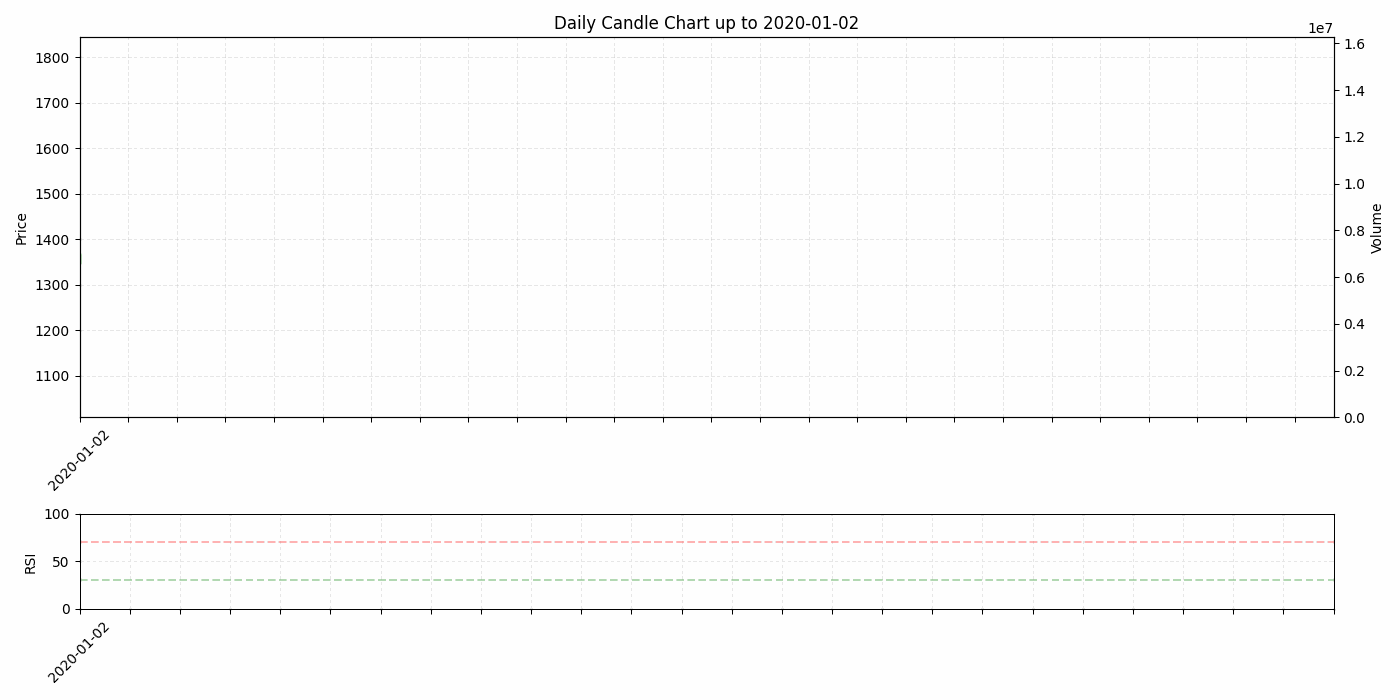

In [7]:
from IPython.display import Image
Image(filename="final_lab.gif")

<div style="
    background-color: #f5f5f5;
    border: 2px solid #555;
    padding: 20px;
    border-radius: 8px;
    font-family: 'Georgia', serif;
    line-height: 1.8;
    max-width: 700px;
    margin: auto;
    box-shadow: 5px 5px 10px rgba(0,0,0,0.1);">
    <h2 style="color: #333; text-align: center;">TECHNICAL CHART</h2>
    <blockquote style="border-left: 4px solid #555; padding-left: 10px;">
        Indicators
    </blockquote>
    <blockquote style="border-left: 4px solid #555; padding-left: 10px;">
        Bollinger Bands
    </blockquote>
    <blockquote style="border-left: 4px solid #555; padding-left: 10px;">
        MACD
    </blockquote><blockquote style="border-left: 4px solid #555; padding-left: 10px;">
        SMA/EMA/Bollinger Bands
    </blockquote>
</div>

In [8]:
df_2020 = df[df['year'] == 2020].sort_values('date').reset_index(drop=True)

df_2020['SMA_10'] = df_2020['close'].rolling(window=10).mean()
df_2020['EMA_12'] = df_2020['close'].ewm(span=12, adjust=False).mean()
df_2020['EMA_26'] = df_2020['close'].ewm(span=26, adjust=False).mean()
df_2020['MACD'] = df_2020['EMA_12'] - df_2020['EMA_26']
df_2020['MACD_Signal'] = df_2020['MACD'].ewm(span=9, adjust=False).mean()
df_2020['MACD_Hist'] = df_2020['MACD'] - df_2020['MACD_Signal']

delta = df_2020['close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df_2020['RSI'] = 100 - (100 / (1 + rs))

df_2020['BB_MID'] = df_2020['close'].rolling(window=20).mean()
df_2020['BB_STD'] = df_2020['close'].rolling(window=20).std()
df_2020['BB_UPPER'] = df_2020['BB_MID'] + 2 * df_2020['BB_STD']
df_2020['BB_LOWER'] = df_2020['BB_MID'] - 2 * df_2020['BB_STD']

fig = make_subplots(
    rows=4, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    row_heights=[0.4, 0.2, 0.2, 0.2],
    subplot_titles=("Candlestick + Indicators", "MACD", "RSI", "Volume")
)

fig.add_trace(go.Candlestick(
    x=df_2020['date'],
    open=df_2020['open'],
    high=df_2020['high'],
    low=df_2020['low'],
    close=df_2020['close'],
    name="Candles"), row=1, col=1)

fig.add_trace(go.Scatter(x=df_2020['date'], y=df_2020['SMA_10'], mode='lines', name='SMA 10'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_2020['date'], y=df_2020['EMA_12'], mode='lines', name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_2020['date'], y=df_2020['BB_UPPER'], mode='lines', name='BB Upper', line=dict(width=1, color='purple')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_2020['date'], y=df_2020['BB_LOWER'], mode='lines', name='BB Lower', line=dict(width=1, color='purple')), row=1, col=1)

fig.add_trace(go.Scatter(x=df_2020['date'], y=df_2020['MACD'], name='MACD', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=df_2020['date'], y=df_2020['MACD_Signal'], name='Signal', line=dict(color='orange')), row=2, col=1)
fig.add_trace(go.Bar(x=df_2020['date'], y=df_2020['MACD_Hist'], name='Histogram', marker_color='grey'), row=2, col=1)

fig.add_trace(go.Scatter(x=df_2020['date'], y=df_2020['RSI'], name='RSI', line=dict(color='orange')), row=3, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=3, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=3, col=1)

fig.add_trace(go.Bar(x=df_2020['date'], y=df_2020['volume'], name='Volume', marker_color='lightgrey'), row=4, col=1)

fig.update_layout(
    title="Interactive Stock Chart with Technical Indicators",
    height=900,
    xaxis_rangeslider_visible=False,
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    template='plotly_white'
)
fig.write_html("Figure.html")
IFrame("Figure.html", width="100%", height=600)